<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/socio_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2

In [ ]:
df = pd.read_csv('/content/(3)_NL_EVsurvey_data_EN_datavalues.csv')

In [ ]:
X=df[[
 'nAgeCat',
 'xHighLevEdu',
 'xIncome',
 'nIncCat',
 'nProv',
 'nGen',
 'nAg',
 'nEdu',
 'nReg']]
y=df['nQ16']

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([3.90878084e+01, 9.40893398e+01, 2.23845770e+09, 8.99339420e+00,
        9.54050206e+00, 3.17724537e+00, 3.90878084e+01, 2.55751094e+01,
        2.46484413e+00]),
 array([1.66289062e-08, 2.89743742e-20, 0.00000000e+00, 2.93788433e-02,
        2.29043673e-02, 3.65096433e-01, 1.66289062e-08, 1.17048502e-05,
        4.81678052e-01]))

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

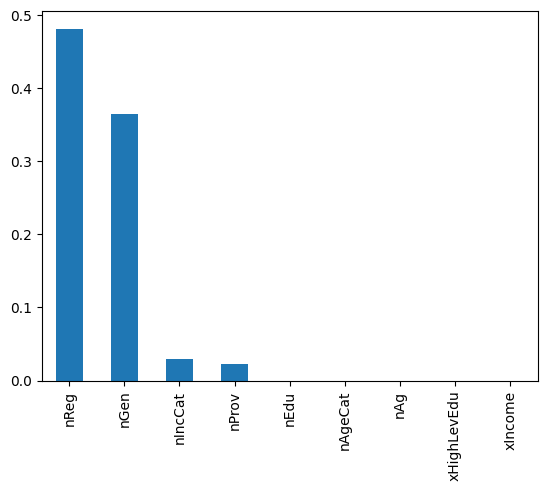

In [ ]:
p_values.plot.bar()

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)


# Get feature importances
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp.head(10))


Feature Importance considering buying an EV
nProv          0.247962
xIncome        0.155023
nReg           0.145569
xHighLevEdu    0.141697
nGen           0.074833
nAgeCat        0.073231
nAg            0.071587
nIncCat        0.052146
nEdu           0.037951
dtype: float64


In [ ]:
df2 = pd.read_csv('/content/(6)_Transnational_EVsurvey_datavalues.csv')


Germany

In [ ]:
columnToFilter = "Country"
itemToFilter = 6

columnToFilter = columnToFilter.capitalize()


df_ger = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_Ger=df_ger[['Gender',
 'RegionGermany',
 'PunchRegionGermany',
 'EducationGermany',
 'Edu',
 'PoliticsGermany','lft', 'Lftcat'
 ]]
y2=df_ger['Q16']

In [ ]:
chi_scores2 = chi2(X_Ger,y2)

In [ ]:
chi_scores2

(array([6.39261567e+00, 6.87211610e+00, 1.56942106e+00, 2.31040936e+01,
        8.87247596e+00, 7.06532187e+09, 4.94101182e+02, 5.23985255e+01]),
 array([9.39950509e-002, 7.60875171e-002, 6.66343092e-001, 3.84149280e-005,
        3.10353274e-002, 0.00000000e+000, 9.05765849e-107, 2.46301721e-011]))

In [ ]:
p_values2 = pd.Series(chi_scores2[1],index = X_Ger.columns)
p_values2.sort_values(ascending = False , inplace = True)

<Axes: >

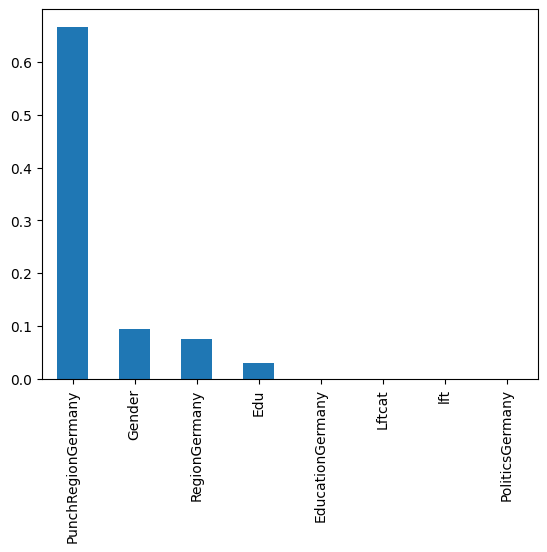

In [ ]:
p_values2.plot.bar()

In [56]:

model_ger = RandomForestClassifier()
model_ger.fit(X_Ger, y2)


# Get feature importances
feat_imp_ger = pd.Series(model_ger.feature_importances_, index=X_Ger.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_ger.head(10))

Feature Importance considering buying an EV
lft                   0.301297
PoliticsGermany       0.212127
RegionGermany         0.152575
EducationGermany      0.107495
PunchRegionGermany    0.086024
Lftcat                0.063724
Gender                0.043631
Edu                   0.033128
dtype: float64


Hungary

In [ ]:
columnToFilter = "Country"
itemToFilter = 31

columnToFilter = columnToFilter.capitalize()


df_hun = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_hun=df_hun[['Gender',
 'RegionHungary',
 'PunchRegionHungary',
 'EducationHungary',
 'Edu',
 'PoliticsHungary','lft', 'Lftcat'
 ]]
y_hun=df_hun['Q16']

In [ ]:
chi_scores_hun = chi2(X_hun,y_hun)

In [ ]:
p_values_hun = pd.Series(chi_scores_hun[1],index = X_hun.columns)
p_values_hun.sort_values(ascending = False , inplace = True)

<Axes: >

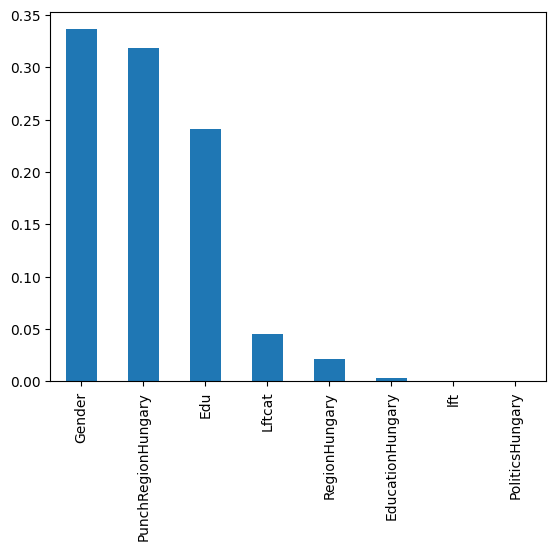

In [ ]:
p_values_hun.plot.bar()

In [57]:

model_hun = RandomForestClassifier()
model_hun.fit(X_hun, y_hun)


# Get feature importances
feat_imp_hun = pd.Series(model_hun.feature_importances_, index=X_hun.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_hun.head(10))

Feature Importance considering buying an EV
lft                   0.298414
PoliticsHungary       0.181610
RegionHungary         0.176884
EducationHungary      0.103632
PunchRegionHungary    0.087883
Lftcat                0.074187
Gender                0.043606
Edu                   0.033783
dtype: float64


Norway

In [ ]:
columnToFilter = "Country"
itemToFilter = 36

columnToFilter = columnToFilter.capitalize()


df_nor = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_nor=df_nor[['Gender',
 'RegionNorway',
 'PunchRegionNorway',
 'EducationNorway',
 'Edu',
 'PoliticsNorway','lft', 'Lftcat'
 ]]
y_nor=df_nor['Q16']

<Axes: >

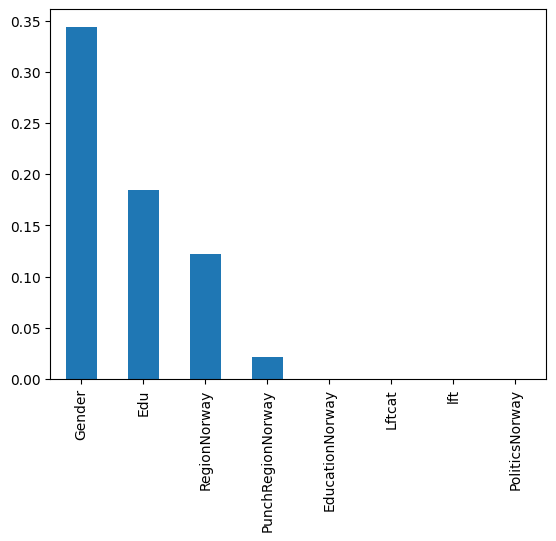

In [ ]:
chi_scores_nor = chi2(X_nor,y_nor)
p_values_nor = pd.Series(chi_scores_nor[1],index = X_nor.columns)
p_values_nor.sort_values(ascending = False , inplace = True)
p_values_nor.plot.bar()

In [58]:
model_nor = RandomForestClassifier()
model_nor.fit(X_nor, y_nor)


# Get feature importances
feat_imp_nor = pd.Series(model_nor.feature_importances_, index=X_nor.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_nor.head(10))

Feature Importance considering buying an EV
lft                  0.286725
PoliticsNorway       0.186329
RegionNorway         0.170866
PunchRegionNorway    0.108965
EducationNorway      0.092177
Lftcat               0.068002
Gender               0.047886
Edu                  0.039050
dtype: float64


Denmark

In [ ]:
columnToFilter = "Country"
itemToFilter = 37

columnToFilter = columnToFilter.capitalize()


df_den = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_den=df_den[['Gender',
 'RegionDenmark',
 'EducationDenmark',
 'Edu',
 'PoliticsDenmark','lft', 'Lftcat'
 ]]
y_den=df_den['Q16']

<Axes: >

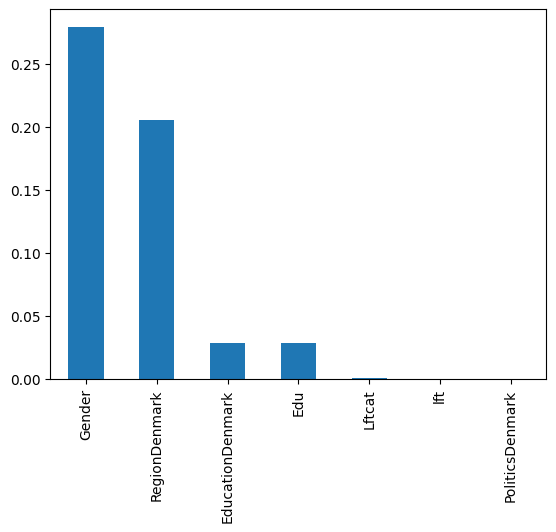

In [ ]:
chi_scores_den = chi2(X_den,y_den)
p_values_den = pd.Series(chi_scores_den[1],index = X_den.columns)
p_values_den.sort_values(ascending = False , inplace = True)

p_values_den.plot.bar()

In [59]:
model_den = RandomForestClassifier()
model_den.fit(X_den, y_den)


# Get feature importances
feat_imp_den = pd.Series(model_den.feature_importances_, index=X_den.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_den.head(10))

Feature Importance considering buying an EV
lft                 0.404649
PoliticsDenmark     0.247173
RegionDenmark       0.176962
Lftcat              0.067038
Gender              0.051400
EducationDenmark    0.026967
Edu                 0.025810
dtype: float64
